In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel("Housing.xlsx")
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
0,2,1.00,1180,5650,1.0,0,0,3,1180,0,1955,0,231300.0
1,3,2.25,2570,7242,2.0,0,0,3,2170,400,1951,1991,538000.0
2,2,1.00,770,10000,1.0,0,0,3,770,0,1933,0,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,1050,910,1965,0,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,1680,0,1987,0,510000.0


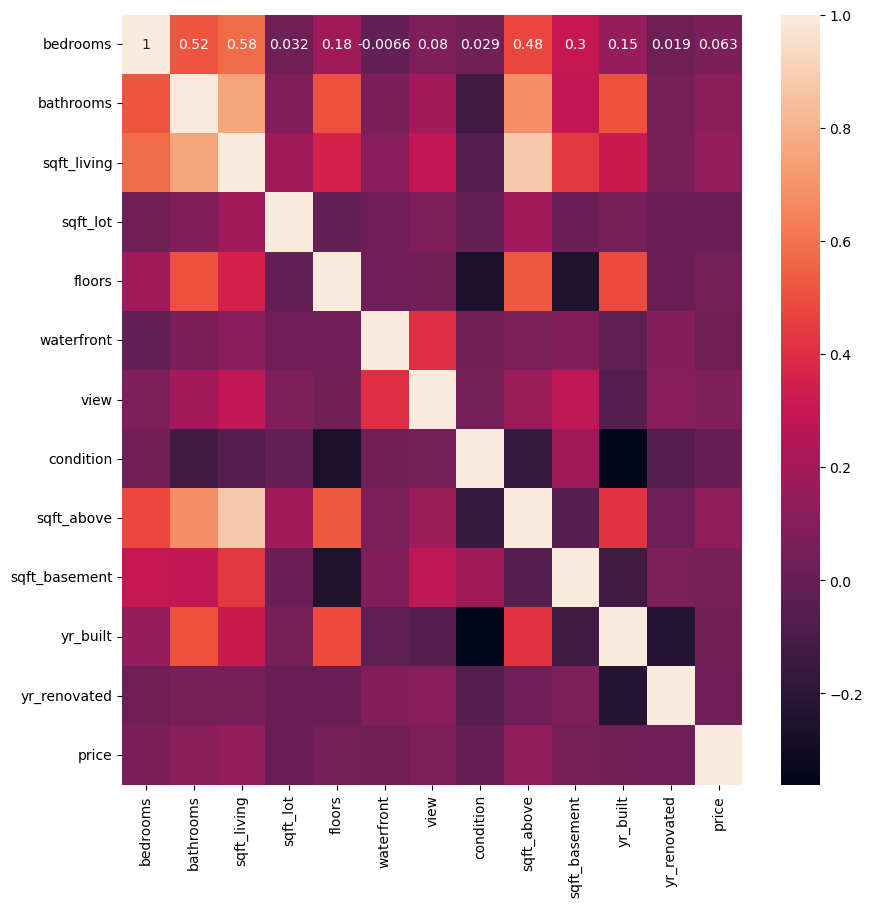

In [3]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

In [4]:
x = df.iloc[:,:-1]
y = df["price"]

In [5]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [8]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

## Linear Regression

In [9]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100

2.0906425838847498

In [26]:
print(mean_squared_error(y_test,lr.predict(x_test))) 
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

8.886751053878742e+19
1448392370.374485
9426956589.418848


In [22]:
lr.coef_

array([-2.38632496e+08,  4.37294900e+08,  5.56805711e+22, -2.33138474e+08,
       -1.05320459e+08, -5.76195648e+07,  2.93581675e+08,  5.06474274e+07,
       -5.02030982e+22, -2.68311561e+22, -3.05790054e+08,  7.67929369e+07])

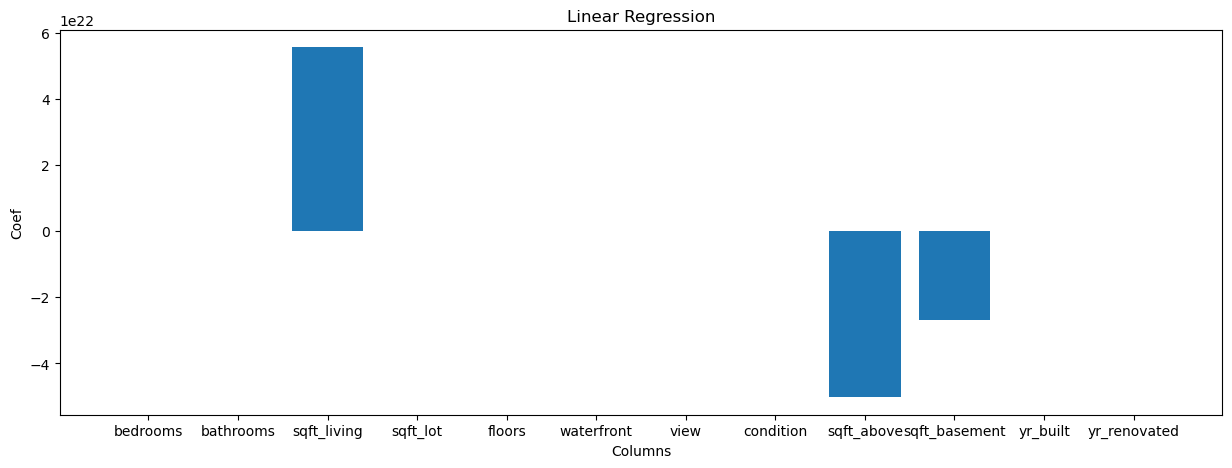

In [11]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,lr.coef_)
plt.title("Linear Regression")
plt.xlabel("Columns")
plt.ylabel("Coef")
plt.show()

## Lasso

In [12]:
la = Lasso(alpha=0.01)
la.fit(x_train,y_train)
la.score(x_test,y_test)*100

2.098535101488108

In [27]:
print(mean_squared_error(y_test,la.predict(x_test))) 
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

8.88603468885521e+19
1458448977.830642
9426576626.143349


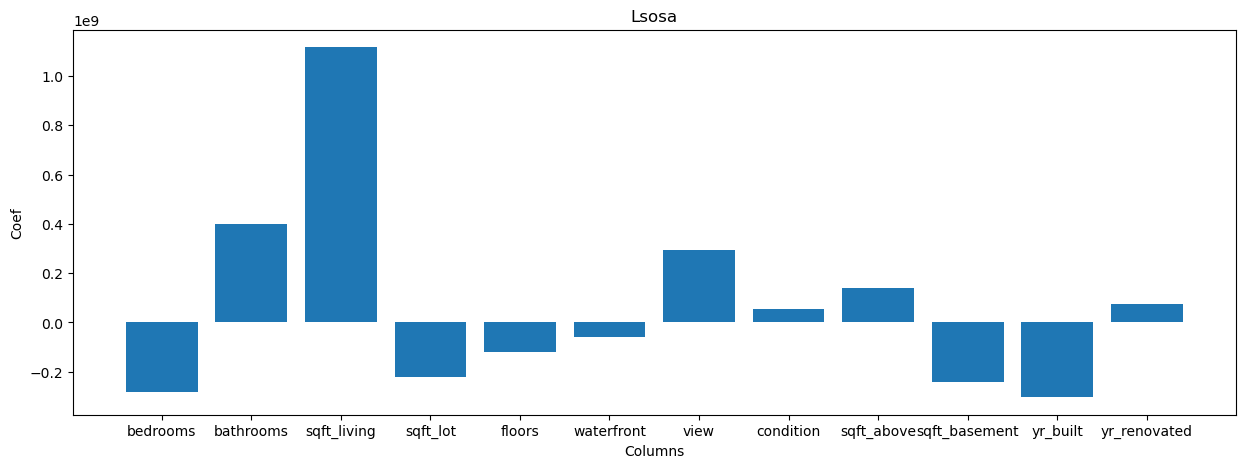

In [13]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,la.coef_)
plt.title("Lsosa")
plt.xlabel("Columns")
plt.ylabel("Coef")
plt.show()

## Ridge

In [14]:
ri = Ridge(alpha=10)
ri.fit(x_train,y_train)
ri.score(x_test,y_test)*100

2.0986749780901315

In [28]:
print(mean_squared_error(y_test,ri.predict(x_test))) 
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

8.886021992943673e+19
1458139826.8093271
9426569892.035849


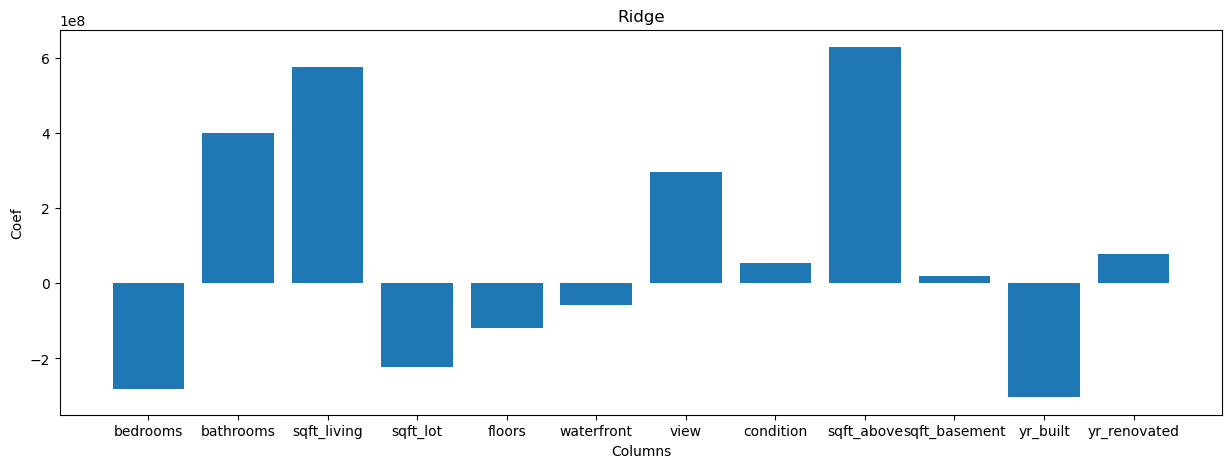

In [15]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,ri.coef_)
plt.title("Ridge")
plt.xlabel("Columns")
plt.ylabel("Coef")
plt.show()

In [29]:
df1 = pd.DataFrame({"col_name":x.columns,"LinearRegression":lr.coef_,"Lasso":la.coef_,"Ridge":ri.coef_})

In [30]:
df1

,col_name,LinearRegression,Lasso,Ridge
0,bedrooms,-2.386325e+08,-2.809920e+08,-2.803654e+08
1,bathrooms,4.372949e+08,3.996378e+08,3.991180e+08
2,sqft_living,5.568057e+22,1.117255e+09,5.757381e+08
3,sqft_lot,-2.331385e+08,-2.236040e+08,-2.233032e+08
4,floors,-1.053205e+08,-1.193644e+08,-1.189676e+08
5,waterfront,-5.761956e+07,-5.869579e+07,-5.855106e+07
6,view,2.935817e+08,2.953510e+08,2.952700e+08
7,condition,5.064743e+07,5.473183e+07,5.478481e+07
8,sqft_above,-5.020310e+22,1.405710e+08,6.280421e+08
9,sqft_basement,-2.683116e+22,-2.413309e+08,1.966994e+07
